### Group 20 Project Proposal
# Classification for an ATP playing surface, based on total aces and points won on first serve

### Introduction

Our group will be using the Tennis Dataset, which was in one of the datasets provided to us. It is also linked above for ease of access. We will be doing a classification project, and our target variable will be the playing surface. The predictor variables used will include (but are not limited to) total aces, total points won when converting the first serve, etc.. There are three types of tennis court surfaces—grass, clay, and hard. They each have their advantages and disadvantages. Our goal is to see how the games played differ from surface to surface in terms of total points and such. For example, it is often said that hard courts favour high and predictable bounces which make for longer rallies as compared to clay surfaces that slow the speed of the ball down. 


### Preliminary Exploratory Data Analysis

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#Reading the csv file from an external source(url)
tennis_data<-read_csv("https://drive.google.com/uc?export=download&id=1fOQ8sy_qMkQiQEAO6uFdRX4tLI8EpSTn")

glimpse(tennis_data)

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 6,866
Columns: 50
$ ...1               <dbl> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1…
$ tourney_id         <chr> "2019-M020", "2019-M020", "2019-M020", "2019-M020",…
$ tourney_name       <chr> "Brisbane", "Brisbane", "Brisbane", "Brisbane", "Br…
$ surface            <chr> "Hard", "Hard", "Hard", "Hard", "Hard", "Hard", "Ha…
$ draw_size          <dbl> 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,…
$ tourney_level      <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "…
$ tourney_date       <dbl> 20181231, 20181231, 20181231, 20181231, 20181231, 2…
$ match_num          <dbl> 300, 299, 298, 297, 296, 295, 294, 293, 292, 291, 2…
$ winner_id          <dbl> 105453, 106421, 105453, 104542, 106421, 104871, 105…
$ winner_seed        <chr> "2", "4", "2", NA, "4", NA, "2", NA, "7", "4", "5",…
$ winner_entry       <chr> NA, NA, NA, "PR", NA, NA, NA, "PR", NA, NA, NA, NA,…
$ winner_name        <chr> "Kei Nishikori", "Daniil Medvedev", "Kei Nishikori"…
$ winner_hand   

In [4]:
#Filtering the data for the columns that are needed, as well as filtering out any observations that contain No values, 
#before mutating the different variable
filtered_data<- tennis_data|>
                select(tourney_id,w_ace,surface,l_ace,w_1stWon,l_1stWon)|>
                filter(surface!="None")|>
                mutate(surface=as_factor(surface))|>
                mutate(total_aces=w_ace+l_ace)|>
                mutate(total_first_won=w_1stWon+l_1stWon)
filtered_data

tourney_id,w_ace,surface,l_ace,w_1stWon,l_1stWon,total_aces,total_first_won
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-M020,3,Hard,8,31,34,11,65
2019-M020,10,Hard,17,28,36,27,64
2019-M020,2,Hard,10,26,15,12,41
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2017-M-DC-2017-WG-M-BEL-FRA-01,12,Hard,1,31,30,13,61
2017-M-DC-2017-WG-M-BEL-FRA-01,1,Hard,10,47,44,11,91
2017-M-DC-2017-WG-M-BEL-FRA-01,7,Hard,1,34,29,8,63


In [5]:
#Splitting the dataset into training and testing sets
set.seed(1234)

tennis_split<-initial_split(filtered_data,prop=0.75,strata=surface)
tennis_train<-training(tennis_split)
tennis_test<-testing(tennis_split)

tennis_train

tourney_id,w_ace,surface,l_ace,w_1stWon,l_1stWon,total_aces,total_first_won
<chr>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-9158,5,Clay,11,37,29,16,66
2019-9158,6,Clay,4,28,27,10,55
2019-9158,1,Clay,1,33,19,2,52
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2017-0605,5,Hard,10,47,42,15,89
2017-M-DC-2017-WG-M-BEL-FRA-01,12,Hard,6,40,33,18,73
2017-M-DC-2017-WG-M-BEL-FRA-01,1,Hard,10,47,44,11,91


In [6]:
#Preliminary Analysis for number of observations for each class variable

number_of_clay<-filtered_data|>
                group_by(surface)|>
                filter(surface=="Clay")|>
                summarize(count=n())

number_of_hard<-filtered_data|>
                group_by(surface)|>
                filter(surface=="Hard")|>
                summarize(count=n())

number_of_grass<-filtered_data|>
                group_by(surface)|>
                filter(surface=="Grass")|>
                summarize(count=n())

number_of_clay
number_of_hard
number_of_grass

surface,count
<fct>,<int>
Clay,2099


surface,count
<fct>,<int>
Hard,3942


surface,count
<fct>,<int>
Grass,808


In [7]:
#Preliminary Analysis for means of predictor variables
total_aces_mean<-filtered_data|>
                 filter(total_aces!="NA")|>
                 summarize(total_aces=mean(total_aces))

total_aces_mean 



total_first_won<-filtered_data|>
                 filter(total_first_won!="NA")|>
                 summarize(total_first_won=mean(total_first_won))
total_first_won



total_aces_sd<-filtered_data|>
               filter(total_aces!="NA")|>
               summarize(total_aces=sd(total_aces))

total_aces_sd



total_first_won_sd<-filtered_data|>
                    filter(total_first_won!="NA")|>
                    summarize(total_first_won=sd(total_first_won))

total_first_won_sd

total_aces
<dbl>
13.10201


total_first_won
<dbl>
72.0034


total_aces
<dbl>
9.010924


total_first_won
<dbl>
27.59909


Warning message:
“Removed 64 rows containing missing values (geom_point).”


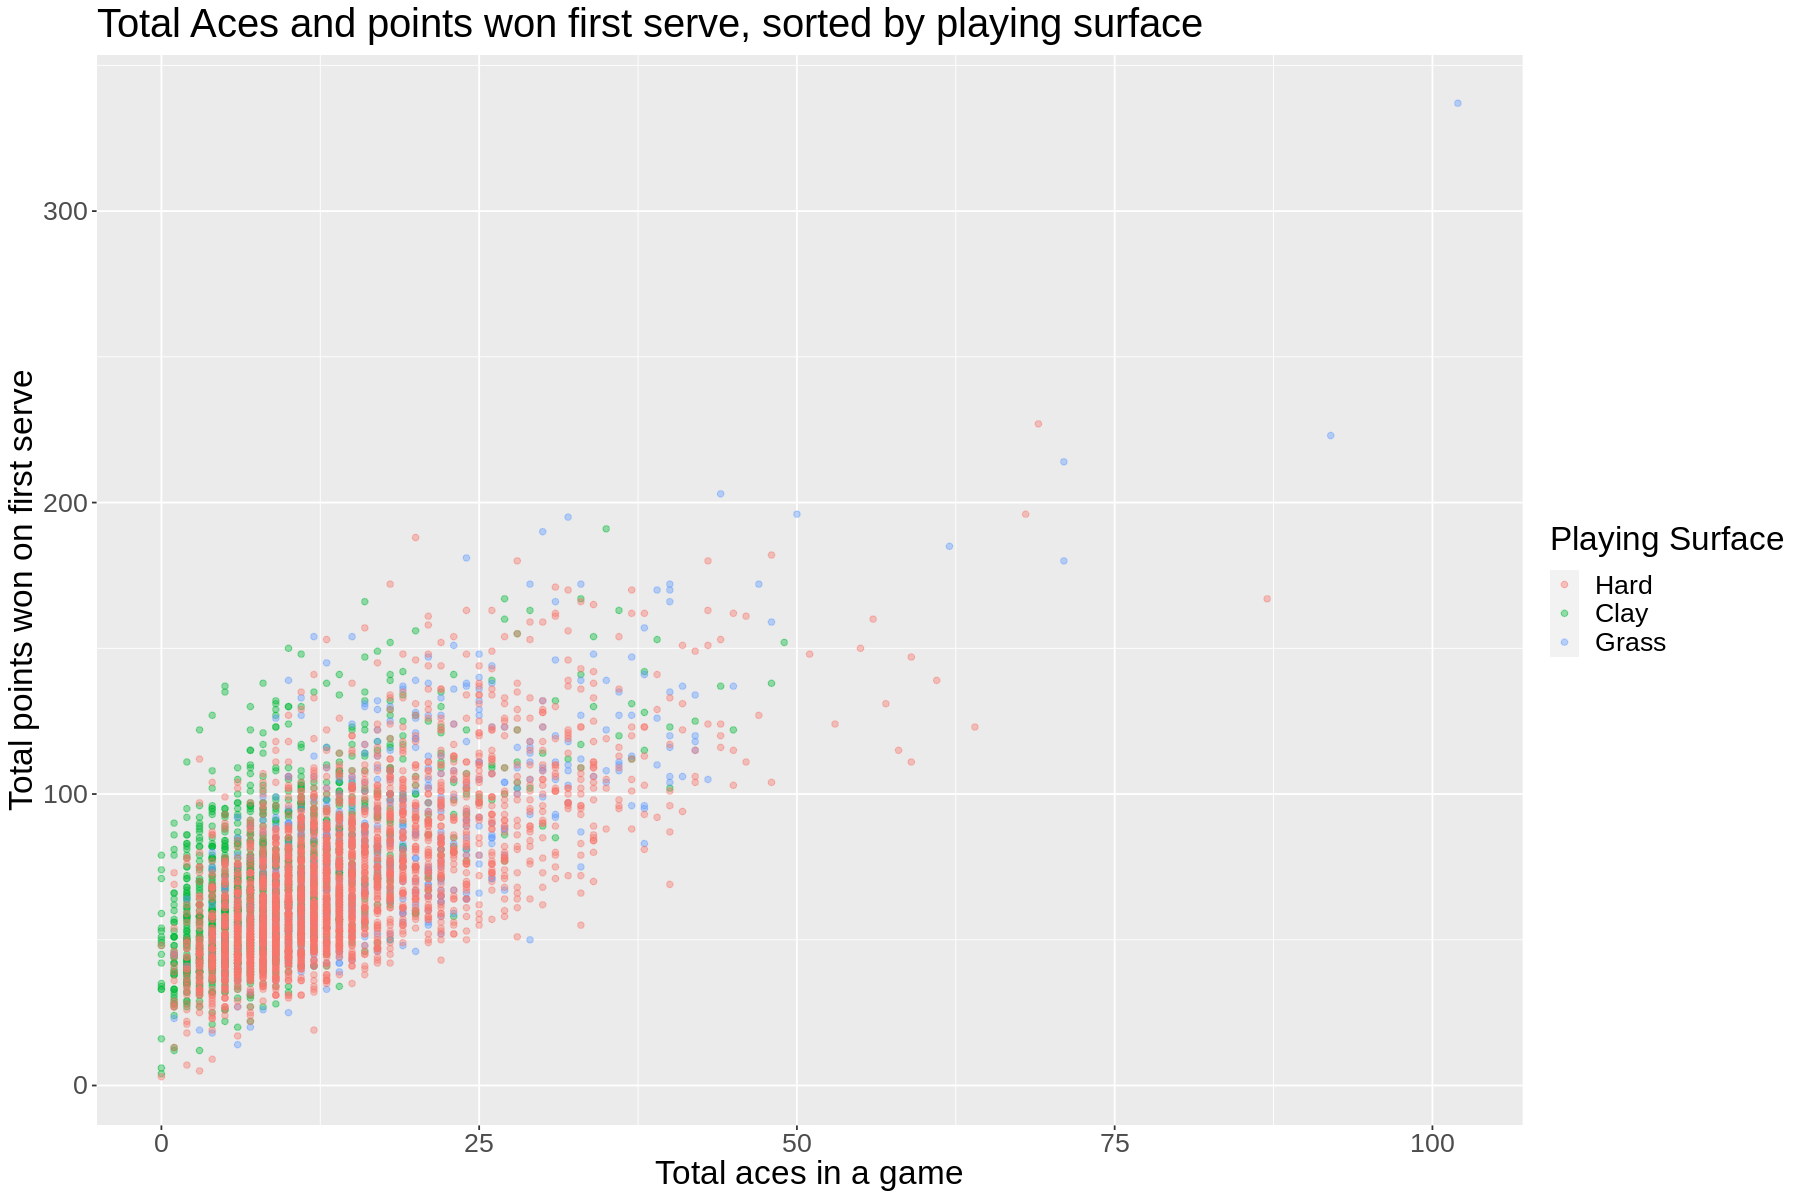

In [8]:
#Plotting the training data, to see how the distribution is, whether there are distinctions between class variables
options(repr.plot.height=10, repr.plot.width=15)

filtered_data_plot<-tennis_train|>
                    ggplot(aes(x=total_aces,y=total_first_won,color=surface))+
                    geom_point(alpha=0.4)+
                    labs(x="Total aces in a game",y="Total points won on first serve",color="Playing Surface",title="Total Aces and points won first serve, sorted by playing surface")+
                    theme(text=element_text(size=20))

filtered_data_plot

### Methods

In terms of the method that we would take, we will be using the tourney_id, surface, w_ace, l_ace, w_1stWon and l_1stWon columns from the original dataset. Later on, we will mutate the two ace columns to form the column “Total Aces”, which accounts for the total number of aces from both players. We will also mutate the two 1st Won columns, to form the column “total_first_won”. These two quantitative variables will be used for the classification of the Class variable “Surface”, as they are both impacted by the difference in the surface variable. This is due to the fact that different surfaces may impact the speed and bounces that occur, which may alter the player’s opponents from returning serves or getting aces. With the use of the K-nearest neighbours method for classification, we can attempt to classify observations, even if the surface variable is unknown.


### Expected Outcomes and Significance

Through this, we expect to find the differences in what a game looks like on different surfaces. This could be significant for individual players that want to see on what surfaces they perform better, and how they need to change their game to accommodate for different playing surfaces. Thus, this would lead to a greater understanding for both coaches and players alike regarding the relationship between how long rallies last and the type of surface the game is being played on. With this, the findings could lead to future questions like whether the playing surfaces affect the higher ranked players more, in comparison to the lower ranked player. Another question that could be asked is whether the ATP should stick to one kind of surface, or are there benefits to having different surfaces for different matches in the tournament.